Compare model results for stepwise increase in CO2 emissions using:
1. FaIR -- uses analytical two-box (slow and fast) model to estimate temperature change (fair.forward)
2. FaIR modified with numerical two-layer-model (fair.forward2) according to Held et al. 2010
3. FaIR with same two-layer-model adjusted with efficacy factor according to Geoffrey et al. 2013 part 2 (fair.foward3)


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pandas as pd

import fair
from matplotlib import pyplot as plt
from fair.forward2 import fair_scm
from fair.forward import fair_scm
from fair.forward3 import fair_scm


Text(0, 0.5, 'Temperature anomaly (K)')

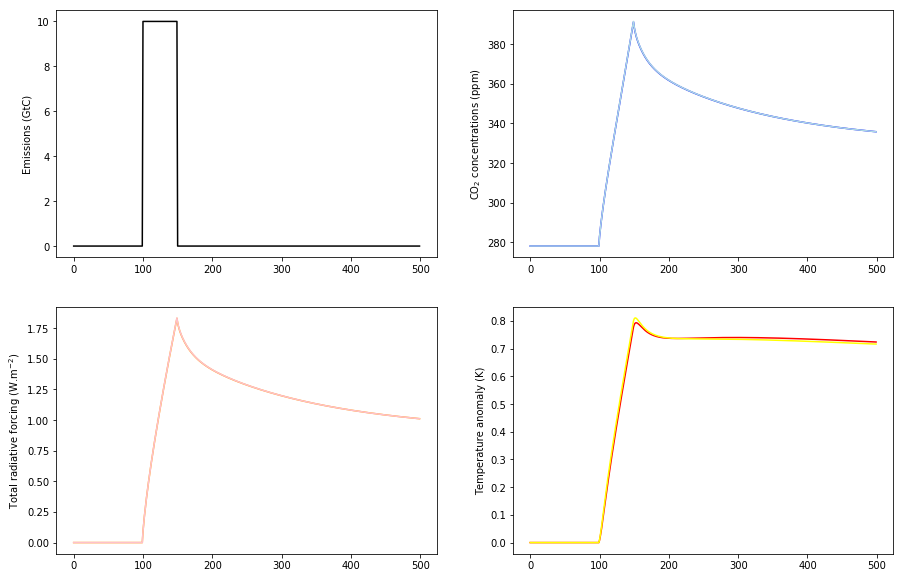

In [2]:
emissions = np.zeros(500)
emissions[:100] = 0
emissions[100:150] = 10 # 10 g emissions/yr for 50 years --> CO2 conc. approximately 400 ppm
emissions[150:] = 0
other_rf = np.zeros(emissions.size)
# for x in range(0, emissions.size):
    # other_rf[x] = 0.5 * np.sin(2 * np.pi * (x) / 14.0)
    
C2,F2,T2 = fair.forward2.fair_scm(
    emissions=emissions,
    other_rf=other_rf,
    useMultigas=False
)

C1,F1,T1 = fair.forward.fair_scm(
    emissions=emissions,
    other_rf=other_rf,
    useMultigas=False
)

C = np.zeros(500)
C[0:200] = 280
C[200:500] = 530 # CO2 doubling in year 200

C3,F3,T3,N3 = fair.forward3.fair_scm(emissions_driven=False, C=C, other_rf=other_rf, useMultigas=False)
C4,F4,T4,N4 = fair.forward3.fair_scm(emissions_driven=False, eps=1.28, gam=0.67, C=C, other_rf=other_rf, useMultigas=False)
C5, F5, T5 = fair.forward.fair_scm(emissions_driven=False, C=C, other_rf=other_rf, useMultigas=False)

fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax1.plot(range(0, emissions.size), emissions, color='black')
ax1.set_ylabel('Emissions (GtC)')
ax2 = fig.add_subplot(222)
ax2.plot(range(0, emissions.size), C1, color='blue')
ax2.plot(range(0, emissions.size), C2, color='lightblue')
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3 = fig.add_subplot(223)
ax3.plot(range(0, emissions.size), F1, color='orange')
ax3.plot(range(0, emissions.size), F2, color='pink')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4 = fig.add_subplot(224)
ax4.plot(range(0, emissions.size), T1, color='red')
ax4.plot(range(0, emissions.size), T2, color='yellow')
ax4.set_ylabel('Temperature anomaly (K)')

Plot net top-of-atmosphere radiative imbalance as a function of 1 ) time and 2) temperature anomaly across models

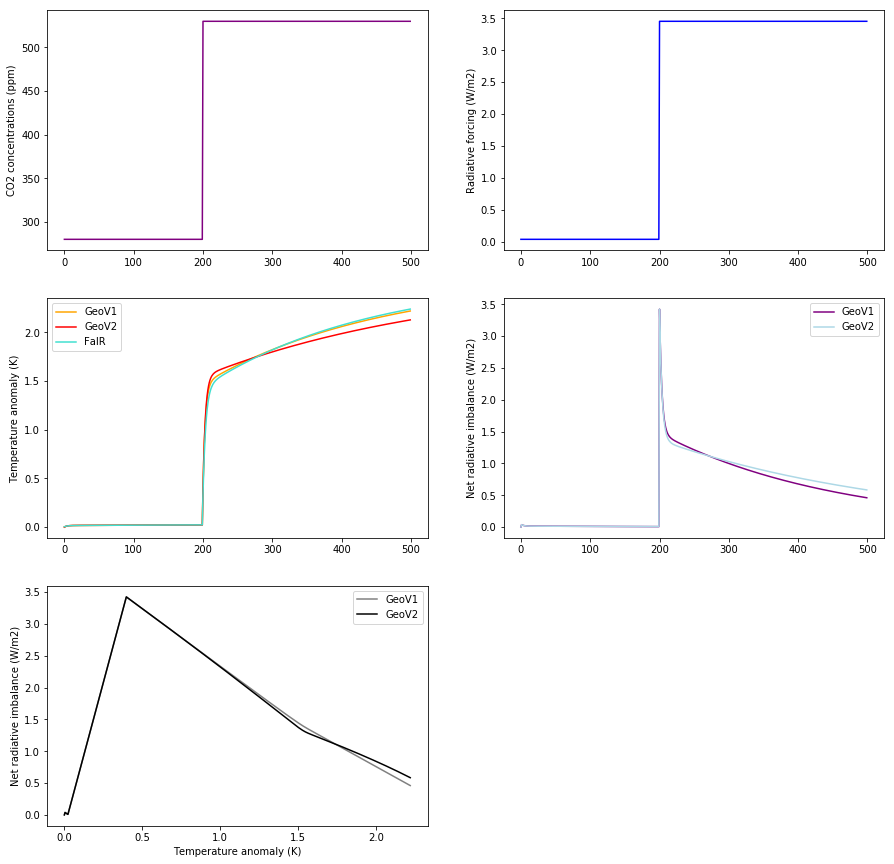

In [3]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax1.plot(range(0, C.size), C3, color='purple')
ax1.set_ylabel('CO2 concentrations (ppm)')
ax2 = fig.add_subplot(322)
ax2.plot(range(0, C.size), F3, color='blue')
ax2.set_ylabel('Radiative forcing (W/m2)')
ax3 = fig.add_subplot(323)
ax3.plot(range(0, C.size), T3, color='orange', label='GeoV1')
ax3.plot(range(0, C.size), T4, color='red', label='GeoV2')
ax3.plot(range(0, C.size), T5, color='turquoise', label='FaIR')
ax3.set_ylabel('Temperature anomaly (K)')
ax3.legend()
ax4 = fig.add_subplot(324)
ax4.plot(range(0, C.size), N3, color='purple', label='GeoV1')
ax4.plot(range(0, C.size), N4, color='lightblue', label='GeoV2')
ax4.set_ylabel('Net radiative imbalance (W/m2)')
ax4.legend()
ax5 = fig.add_subplot(325)
ax5.plot(T3, N3, color='gray', label='GeoV1')
ax5.plot(T3, N4, color='black', label='GeoV2')
ax5.set_xlabel('Temperature anomaly (K)')
ax5.set_ylabel('Net radiative imbalance (W/m2)')
ax5.legend()


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
plt.rcParams['font.size'] = 16

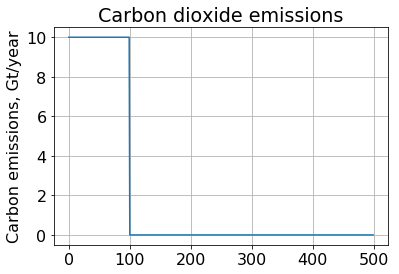

<Figure size 432x288 with 0 Axes>

In [6]:
#years to run the simulation (past 2019)
years = 500

emissions = np.zeros(500)
emissions[:100] = 10.0
emissions[100:] = 0

plt.plot((range(len(emissions))),emissions)
plt.grid()
plt.title('Carbon dioxide emissions')
plt.ylabel('Carbon emissions, Gt/year')
plt.savefig('carbonemissions.png')
plt.figure()

C,F,T = fair.forward.fair_scm(
    emissions=emissions,
    other_rf=other_rf,
    useMultigas=False
)
